# Lossy Coding
Nicola Zomer <br>
16 October, 2022


In [2]:
import numpy as np
import graphviz
import matplotlib.pyplot as plt

%matplotlib inline

# Exercise 1
## Task
Consider a random variable $X$ with values in
$$
    A_X = \{x_1, . . . , x_8\}
$$
and probability mass function
$$
    P_X = \{1/4, 1/4, 1/4, 3/16, 1/64, 1/64, 1/64, 1/64\}
$$

- What is the information content of each outcome $x_i$?
- What is the entropy of the distribution?
- Draw a binary probability tree for $X$. For each node, write the corresponding event; for each edge, write the corresponding conditional probability
- Plot the essential bit content $H_\delta(X)$ as a function of the error $\delta$


In [3]:
def information_content(x):
    # x is the probability vector
    return -np.log2(x)

def entropy(p):
    return np.dot(p, information_content(p))

p_x = {"x1":1/4, "x2":1/4, "x3":1/4, "x4":3/16, "x5":1/64, "x6":1/64, "x7":1/64, "x8":1/64}
prob = np.array(list(p_x.values()))

print('P_X:\n', p_x)
print('Total probability:', prob.sum())


P_X:
 {'x1': 0.25, 'x2': 0.25, 'x3': 0.25, 'x4': 0.1875, 'x5': 0.015625, 'x6': 0.015625, 'x7': 0.015625, 'x8': 0.015625}
Total probability: 1.0


In [4]:
I_x = information_content(prob)
print('Information content:\n', dict(zip(p_x.keys(), I_x)))

Information content:
 {'x1': 2.0, 'x2': 2.0, 'x3': 2.0, 'x4': 2.415037499278844, 'x5': 6.0, 'x6': 6.0, 'x7': 6.0, 'x8': 6.0}


In [5]:
H_x = entropy(prob)
print('Entropy of the distribution: H[X]=%.4f' %(H_x))


Entropy of the distribution: H[X]=2.3278


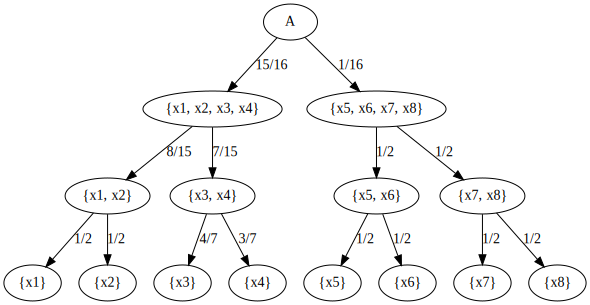

In [6]:
f = graphviz.Digraph('probability_tree')

f.node('L0', label='A')
f.node('L1_1', label='{x1, x2, x3, x4}')
f.node('L1_2', label='{x5, x6, x7, x8}')
f.node('L21_1', label='{x1, x2}')
f.node('L21_2', label='{x3, x4}')
f.node('L22_1', label='{x5, x6}')
f.node('L22_2', label='{x7, x8}')
f.node('L31_1', label='{x1}')
f.node('L31_2', label='{x2}')
f.node('L32_1', label='{x3}')
f.node('L32_2', label='{x4}')
f.node('L33_1', label='{x5}')
f.node('L33_2', label='{x6}')
f.node('L34_1', label='{x7}')
f.node('L34_2', label='{x8}')

f.edge('L0', 'L1_1', label='15/16')
f.edge('L0', 'L1_2', label='1/16')
f.edge('L1_1', 'L21_1', label='8/15')
f.edge('L1_1', 'L21_2', label='7/15')
f.edge('L1_2', 'L22_1', label='1/2')
f.edge('L1_2', 'L22_2', label='1/2')
f.edge('L21_1', 'L31_1', label='1/2')
f.edge('L21_1', 'L31_2', label='1/2')
f.edge('L21_2', 'L32_1', label='4/7')
f.edge('L21_2', 'L32_2', label='3/7')
f.edge('L22_1', 'L33_1', label='1/2')
f.edge('L22_1', 'L33_2', label='1/2')
f.edge('L22_2', 'L34_1', label='1/2')
f.edge('L22_2', 'L34_2', label='1/2')

f

The essential bit content $H_\delta(X)$ of a subset $S_\delta \subseteq A_X$ is defined as $H_\delta(X) = \log{|S_\delta|}$. In this case:
- if $\delta < 1/64$ then $H_\delta(X)=\log8=3$
- if $\delta < 1/32$ then $H_\delta(X)=\log7$
- if $\delta < 3/64$ then $H_\delta(X)=\log6$
- if $\delta < 1/16$ then $H_\delta(X)=\log5$
- if $\delta < 1/4$ then $H_\delta(X)=\log4=2$
- if $\delta < 1/2$ then $H_\delta(X)=\log3$
- if $\delta < 3/4$ then $H_\delta(X)=\log2$
- if $\delta < 1$ then $H_\delta(X)=\log1=0$


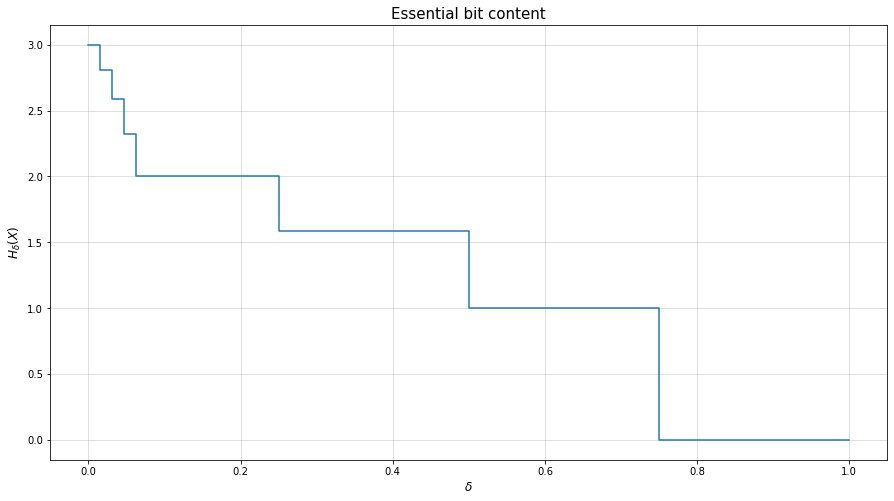

In [7]:
x_step = [0, 1/64, 1/32, 3/64, 1/16, 1/4, 1/2, 3/4, 1]
y_step = np.log2(range(8,0, -1))
y_step = np.insert(y_step, 0, 3)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.step(x_step, y_step)
ax.grid(alpha=0.5)
ax.set_title('Essential bit content', fontsize=15)
ax.set_xlabel('$\delta$', fontsize=12)
ax.set_ylabel('$H_\delta(X)$', fontsize=12)

plt.show()


# Exercise 2 
## Task
Consider $X^{(3)} = X \times X \times X$:
- what is the entropy of $X^{(3)}$?
- Plot $H_\delta(X^{(3)})$ as a function of $\delta$
- How many binary digits we need to represent $X^{(3)}$ if we allow an error of 1%?


$X^{(3)}$ has $8^3$ possible outcomes, each with an associated probability. 

In [8]:
comb = np.array(np.meshgrid(np.array(list(p_x.keys())), np.array(list(p_x.keys())), np.array(list(p_x.keys())))).T.reshape(-1, 3)

print('Possible combinations:\n', comb)
print('\nCardinality of X^(3):', len(comb))

Possible combinations:
 [['x1' 'x1' 'x1']
 ['x1' 'x2' 'x1']
 ['x1' 'x3' 'x1']
 ...
 ['x8' 'x6' 'x8']
 ['x8' 'x7' 'x8']
 ['x8' 'x8' 'x8']]

Cardinality of X^(3): 512


In [9]:
prob_3 = np.array(np.meshgrid(prob, prob, prob)).T.reshape(-1, 3).prod(axis=1)
print('Total probability:', prob_3.sum())

Total probability: 1.0


In [10]:
H_x3 = entropy(prob_3)
print('Entropy of X^(3): H[X^(3)]=%.4f' %(H_x3))

Entropy of X^(3): H[X^(3)]=6.9835


In theory, we should have that $H[X^(3)]=3H[X]$. Let's check it.

In [28]:
print('Entropy of X^(3): H[X^(3)]=%.4f' %(H_x3))
print('Entropy of X multiplied by 3: 3*H[X]=%.4f' %(H_x*3))

Entropy of X^(3): H[X^(3)]=6.9835
Entropy of X multiplied by 3: 3*H[X]=6.9835


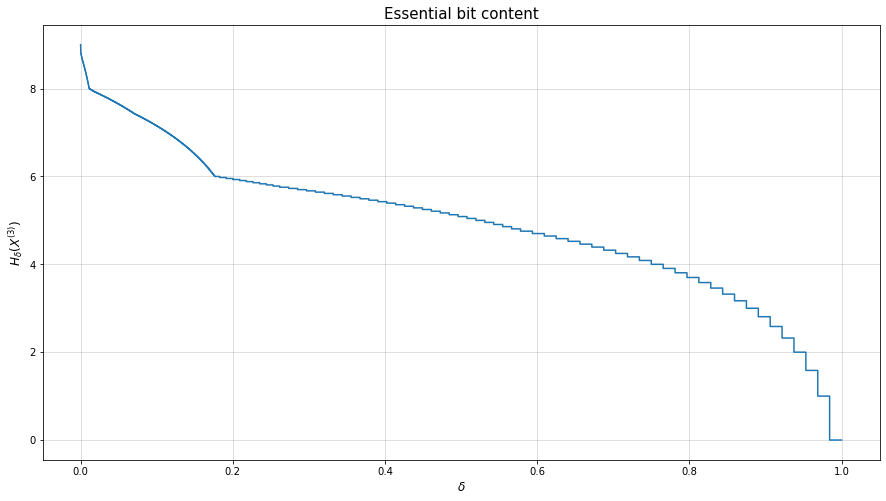

In [11]:
x_step3 = np.sort(prob_3).cumsum()
x_step3 = np.insert(x_step3, 0, 0)

y_step3 = np.log2(range(len(comb),0, -1))
y_step3 = np.insert(y_step3, 0, np.log2(len(comb)))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.step(x_step3, y_step3)
ax.grid(alpha=0.5)
ax.set_title('Essential bit content', fontsize=15)
ax.set_xlabel('$\delta$', fontsize=12)
ax.set_ylabel('$H_\delta(X^{(3)})$', fontsize=12)

plt.show()

In [12]:
print('Essential bit content with delta=0.01: %.4f' %(y_step3[len(x_step3[x_step3<0.01])-1]))

Essential bit content with delta=0.01: 8.1189


If we allow an error of 1% we still need 9 binary digits to uniquely identify all possible outcomes of $X^{(3)}$. However, we could reduce the number of strings, still using 9 bits. 

## What is the minimum $\delta$ we have to pay in order to encode the message with 8 digits?

In [27]:
i_8digits = np.where(y_step3==8)

#print(y_step3[i_8digits])
print('Minimum delta to pay: %.4f%%' %(x_step3[i_8digits]*100))

Minimum delta to pay: 1.1780%


# Extra
23 October, 2022

I can repeat the same process of computing the entropy of $X^{(n)}$ for different values of $n$. For each value of $n$, it is possible to plot $H_\delta(X^{(n)})/n$ as a function of $\delta$. As in this case we are not dealing with a binary random variable, $H_\delta(X^{(n)})/n$ will not be between 0 and 1, but still we can compare the distributions for different values of $n$. <br>
I expect that as $n$ increases the curve aligns more and more with the entropy $H[X]$ of $X$.

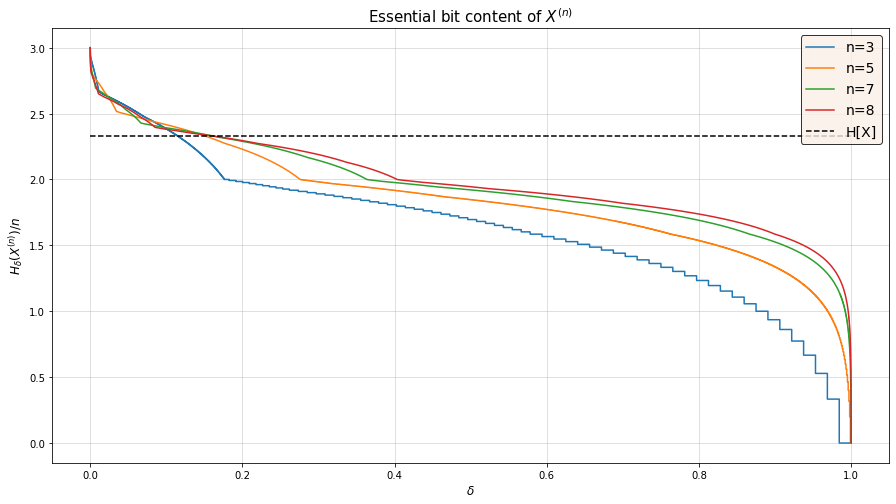

In [14]:
def xy_plot(n):
    len_series = (len(x_step)-1)**n
    # raw_bit_content = 3*n
    
    prob_n = np.array(np.meshgrid(*[prob]*n)).T.reshape(-1, n).prod(axis=1)
    x_step_ = np.sort(prob_n).cumsum()
    x_step_ = np.insert(x_step_, 0, 0)

    y_step_ = np.log2(range(len_series,0, -1))
    y_step_ = np.insert(y_step_, 0, np.log2(len_series))
    
    y_step_/=n
    
    return x_step_, y_step_
    

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for i in [3, 5, 7, 8]:
    xplot, yplot = xy_plot(i)
    ax.step(xplot, yplot, label='n=%i' %i)
    
ax.hlines(H_x, 0, 1, linestyles='dashed', color='black', label='H[X]')
ax.grid(alpha=0.5)
ax.set_title('Essential bit content of $X^{(n)}$', fontsize=15)
ax.set_xlabel('$\delta$', fontsize=12)
ax.set_ylabel('$H_\delta(X^{(n)})/n$', fontsize=12)
ax.legend(edgecolor='black', facecolor='linen', fontsize=14 , loc ='best')

plt.show()